In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
whiteWinedataset = pd.read_excel('winequality-white.xlsx')

In [3]:
whiteWinedataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
#Checking for null bvalues in the dataset
whiteWinedataset.isnull().values.any()

False

In [5]:
#Creating the independent variables(features) and dependent variable(target variable)
x = whiteWinedataset.iloc[:,:-1].values
y = whiteWinedataset.iloc[:,-1].values

In [6]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,[0,3,5,6,8,10]] = sc.fit_transform(x_train[:,[0,3,5,6,8,10]])
x_test[:,[0,3,5,6,8,10]] = sc.transform(x_test[:,[0,3,5,6,8,10]])

In [8]:
##Training the Logistic Regressor model on the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
##Predicting test results
y_pred = classifier.predict(x_test)
print(y_pred)

[6 5 6 6 6 5 6 6 6 6 6 6 5 5 6 6 6 5 6 6 6 6 6 6 6 6 5 5 6 6 5 6 6 6 5 6 6
 5 6 6 6 6 6 6 5 6 5 6 6 6 6 6 5 6 6 6 6 6 5 6 6 5 6 6 6 6 6 5 5 5 6 5 6 6
 6 6 6 5 6 6 6 6 6 5 5 6 6 6 6 6 7 6 6 6 5 6 5 5 6 6 6 5 6 6 5 6 6 5 6 5 5
 6 6 5 6 7 5 5 7 6 5 6 6 5 6 7 6 6 5 6 6 6 6 6 6 5 6 6 5 6 6 6 5 6 6 6 6 6
 6 6 6 6 6 6 5 5 5 6 6 6 6 6 6 6 5 6 5 6 6 6 6 6 6 6 6 6 6 5 6 5 6 6 6 6 6
 6 6 6 6 6 8 5 6 6 6 6 5 6 6 6 6 6 5 6 6 6 6 5 6 6 5 7 6 6 6 6 6 6 6 6 6 6
 6 6 5 5 6 6 6 5 6 6 6 6 6 6 6 6 6 6 5 6 6 6 5 7 5 6 6 6 6 6 5 6 6 5 6 6 6
 7 6 6 6 6 5 6 6 5 6 6 6 6 5 6 5 5 6 6 5 6 6 5 5 6 6 6 6 6 5 6 6 6 7 6 5 5
 6 5 6 6 6 6 6 6 6 6 6 6 5 5 6 6 6 6 6 5 6 5 6 6 5 7 6 6 6 6 6 5 5 6 6 6 5
 6 6 6 5 6 5 5 6 5 6 6 6 6 6 7 6 6 6 6 6 6 6 5 6 6 5 5 6 6 6 6 7 5 6 6 6 5
 5 6 6 5 6 5 6 6 6 6 6 6 5 5 5 5 6 6 5 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 5 6 6 5 6 6 6 6 5 6 6 6 6 6 5 6 6 5 6 6 5 6 5 6 6 5 7 6 6 6 6 5 6 6 5 6
 6 7 6 6 6 6 6 6 5 6 5 6 6 6 6 5 6 6 5 6 6 6 7 5 5 5 5 6 6 5 5 5 6 6 5 6 6
 5 6 6 6 5 6 5 5 6 6 6 6 

In [10]:
##Calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.48367346938775513
[[  0   0   5   4   0   0]
 [  0   0  28  21   2   0]
 [  0   0 134 161   0   0]
 [  1   0  73 327   7   1]
 [  0   0  11 159  13   0]
 [  0   0   0  31   2   0]]


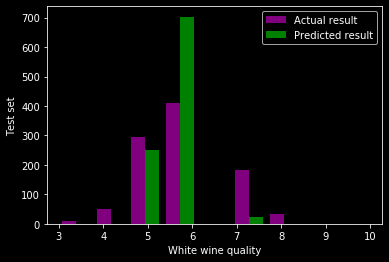

In [11]:
#Visualizing the test results
plt.style.use('dark_background')
bins = np.linspace(3,10,10)
plt.hist([y_test,y_pred],bins=bins,color=['purple','green'],label=['Actual result','Predicted result'])
plt.xlabel('White wine quality')
plt.ylabel('Test set')
plt.legend()
plt.show()

---

In [12]:
##Training the K-NN model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
##Predicting test results
y_pred = classifier.predict(x_test)
print(y_pred)

[6 5 5 6 5 5 6 6 5 6 6 7 6 6 7 6 6 5 6 6 6 6 5 6 6 8 5 5 7 6 5 5 6 7 5 6 7
 7 6 7 6 6 6 6 5 6 5 6 6 6 7 6 6 6 4 7 6 6 5 6 6 5 6 6 6 6 5 5 5 5 6 5 6 6
 6 6 6 5 7 7 5 6 5 6 5 5 6 6 6 6 7 7 5 8 5 6 7 5 5 6 7 5 6 6 5 5 6 6 5 5 5
 6 7 5 7 7 5 5 7 5 5 5 6 5 6 6 5 6 6 6 6 6 6 6 5 6 6 6 6 5 6 6 6 7 6 6 6 6
 6 6 6 6 6 7 6 6 5 5 6 6 5 5 7 5 5 6 6 6 5 6 7 6 5 6 7 7 5 5 6 5 6 6 6 7 6
 6 6 6 5 6 6 5 5 6 6 6 6 4 6 6 5 5 6 7 6 6 6 5 7 6 4 8 7 5 5 7 6 6 6 7 5 7
 6 7 6 5 6 5 6 6 7 6 6 6 5 5 5 7 6 5 5 5 7 6 6 7 5 5 7 6 7 6 6 6 7 6 6 5 6
 7 7 6 6 6 5 6 5 5 6 5 7 7 5 6 5 5 7 6 5 6 7 5 6 6 6 6 6 6 5 5 6 6 5 7 6 6
 7 6 5 6 6 6 7 6 6 7 5 5 6 5 6 6 7 7 5 5 6 6 6 6 6 6 6 7 5 7 6 5 5 6 6 6 5
 6 6 6 5 5 4 6 6 5 6 7 6 6 5 7 5 6 6 6 6 7 7 5 5 7 6 7 5 6 6 5 7 5 6 6 5 6
 6 7 8 6 6 5 6 6 6 6 6 5 6 5 5 5 6 6 5 6 6 7 5 6 7 6 6 5 6 6 7 5 6 6 7 6 6
 6 6 6 6 5 6 5 6 6 6 6 6 8 7 6 7 6 8 5 6 6 6 7 5 6 6 5 6 6 5 5 6 6 5 5 5 6
 6 7 6 6 6 6 6 5 5 5 5 6 6 5 6 5 6 6 7 6 5 5 7 6 5 6 6 5 5 5 5 5 7 6 5 5 5
 6 7 4 5 6 6 5 6 6 7 5 7 

In [14]:
##Calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.49081632653061225
[[  0   0   5   3   0   1]
 [  0   1  34  11   5   0]
 [  0   8 153 122  12   0]
 [  0   2 102 256  46   3]
 [  0   1  17  95  67   3]
 [  0   0   4  14  11   4]]


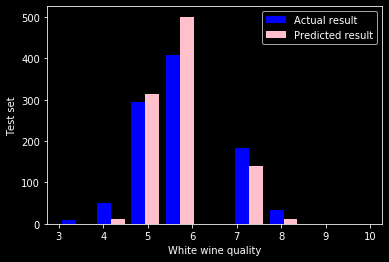

In [15]:
#Visualizing the test results
bins = np.linspace(3,10,10)
plt.hist([y_test,y_pred],bins=bins,color=['blue','pink'],label=['Actual result','Predicted result'])
plt.xlabel('White wine quality')
plt.ylabel('Test set')
plt.legend()
plt.show()

---

In [16]:
##Training the Naive Bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
##Predicting test results
y_pred = classifier.predict(x_test)
print(y_pred)

[6 5 6 6 6 4 6 7 7 5 6 5 5 5 7 6 7 6 7 7 6 7 6 6 6 6 5 5 7 7 5 6 7 7 5 7 7
 5 7 7 7 6 6 5 5 7 5 7 7 6 7 7 4 6 6 6 6 7 5 7 6 5 7 7 6 7 5 5 5 5 7 5 5 7
 6 7 7 5 5 7 6 5 6 7 5 6 7 7 5 6 8 7 5 7 4 5 5 5 6 6 6 6 6 7 6 7 7 5 7 5 6
 6 7 5 7 7 5 5 7 6 5 6 5 5 5 7 5 7 5 6 7 6 7 7 7 5 6 6 6 7 7 6 5 6 6 7 7 6
 7 7 6 6 7 6 5 6 5 6 6 6 7 6 7 7 5 7 5 6 6 7 7 7 6 6 7 6 6 5 5 5 5 7 6 7 6
 6 6 6 5 6 3 5 5 7 5 6 5 7 5 7 6 6 4 7 5 6 7 5 7 6 5 7 7 5 5 7 7 6 7 7 5 6
 7 7 5 5 7 6 5 5 7 7 5 4 4 7 6 7 5 7 5 7 6 6 6 7 5 6 7 6 7 6 5 6 7 5 6 7 7
 7 6 7 7 6 6 6 6 5 6 6 7 6 5 5 5 5 7 7 3 5 7 4 5 7 6 7 6 4 6 5 7 7 8 7 4 5
 6 5 5 6 6 6 7 7 5 8 5 5 6 5 7 7 5 7 6 5 7 5 6 7 5 7 5 5 6 6 5 5 5 7 6 7 5
 6 7 6 4 5 5 4 7 5 5 6 7 6 5 8 6 5 6 6 7 7 7 5 7 7 5 5 6 7 7 5 7 4 5 7 5 5
 5 7 7 5 7 5 7 7 7 5 6 7 5 6 5 5 6 7 5 5 6 7 6 5 7 7 7 3 6 6 7 7 6 6 6 6 6
 7 6 7 7 5 7 5 6 7 5 7 7 7 7 5 5 5 6 4 6 6 5 7 5 6 6 5 7 7 6 6 7 5 6 5 5 6
 6 7 6 7 7 7 6 6 6 6 6 6 6 6 6 5 5 4 7 5 6 5 7 5 5 5 6 6 7 5 6 5 6 6 6 5 5
 4 7 7 7 5 6 5 5 7 5 6 7 

In [18]:
##Calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.4418367346938776
[[  3   3   0   2   1   0]
 [  1  11  17  18   4   0]
 [  2  11 151 104  27   0]
 [  6   4 105 150 143   1]
 [  0   0  18  45 117   3]
 [  0   0   1  12  19   1]]


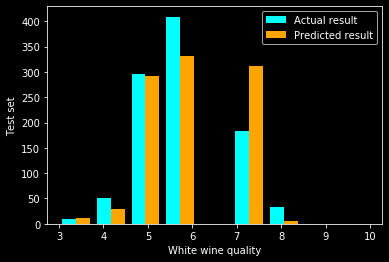

In [19]:
#Visualizing the test results
bins = np.linspace(3,10,10)
plt.hist([y_test,y_pred],bins=bins,color=['cyan','orange'],label=['Actual result','Predicted result'])
plt.xlabel('White wine quality')
plt.ylabel('Test set')
plt.legend()
plt.show()

---

In [20]:
##Training the kernel SVM on the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
##Predicting test results
y_pred = classifier.predict(x_test)
print(y_pred)

[5 5 6 7 6 5 6 6 6 5 6 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 5 5 6 6 5 6 6 6 5 6 6
 5 6 6 6 6 6 6 5 6 5 7 6 5 7 6 5 6 6 6 6 6 5 6 5 5 6 6 6 6 5 5 5 5 6 5 6 7
 6 6 6 5 6 7 5 5 6 6 5 6 6 7 5 6 7 6 5 7 5 5 5 5 6 6 7 5 6 6 5 6 6 6 6 5 5
 6 6 5 6 7 5 5 7 6 5 6 6 5 6 7 5 6 6 6 6 6 7 6 6 5 6 6 6 6 6 6 5 6 6 6 6 6
 6 6 6 6 6 6 5 6 5 6 6 6 6 6 6 6 5 7 6 6 5 6 6 6 6 6 6 6 5 5 5 6 6 6 6 6 6
 6 6 6 6 6 6 6 5 6 5 6 5 6 6 6 6 6 5 6 6 6 6 5 7 6 5 7 7 5 5 6 6 6 6 7 6 6
 6 6 5 5 6 5 5 5 6 6 6 5 6 6 6 6 6 6 5 6 7 6 5 6 5 6 6 6 6 6 6 6 6 5 6 6 6
 7 6 6 6 6 5 6 6 5 5 5 7 5 5 6 5 5 6 6 5 6 7 5 6 6 6 6 6 6 5 5 6 6 6 6 5 5
 6 6 5 6 6 6 7 6 6 6 6 5 5 5 6 6 6 6 5 5 6 5 6 6 5 7 5 5 6 6 6 5 5 6 6 6 5
 6 6 6 6 6 6 5 7 6 6 6 6 6 5 7 6 6 6 6 6 6 7 5 6 6 5 5 6 6 6 6 7 5 5 6 6 5
 5 6 6 5 6 5 6 6 6 6 6 6 5 5 5 5 6 6 5 5 6 7 6 5 7 6 6 6 6 6 6 6 6 6 5 6 6
 6 5 6 6 5 6 6 6 6 5 6 6 6 6 5 6 6 6 5 6 6 5 7 5 6 5 5 7 6 6 5 6 6 5 5 5 6
 6 7 6 6 6 6 6 6 5 6 5 6 6 6 6 5 5 5 6 5 6 6 7 5 5 5 5 6 6 5 5 5 6 6 5 6 5
 5 7 6 6 5 6 5 5 6 5 6 6 

In [22]:
##Calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.5
[[  0   0   5   4   0   0]
 [  0   0  31  19   1   0]
 [  0   0 157 137   1   0]
 [  0   0  92 302  15   0]
 [  0   0  16 136  31   0]
 [  0   0   1  25   7   0]]


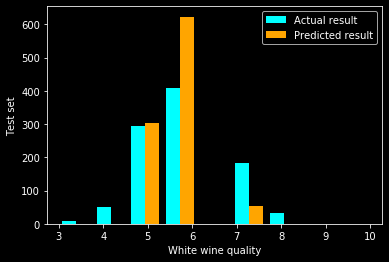

In [23]:
#Visualizing the test results
bins = np.linspace(3,10,10)
plt.hist([y_test,y_pred],bins=bins,color=['cyan','orange'],label=['Actual result','Predicted result'])
plt.xlabel('White wine quality')
plt.ylabel('Test set')
plt.legend()
plt.show()

---

In [24]:
##Training the Decision Tree Classification model on the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [25]:
##Predicting test results
y_pred = classifier.predict(x_test)
print(y_pred)

[3 6 7 5 6 6 6 6 7 6 5 7 5 6 6 6 6 4 7 6 7 7 5 7 7 8 6 5 6 5 5 5 6 6 5 5 7
 7 7 5 5 5 5 6 5 6 4 7 7 6 7 6 5 6 5 7 5 6 5 6 6 6 7 6 5 6 5 5 5 5 6 5 5 6
 6 6 7 5 5 6 6 5 6 6 6 6 7 6 6 6 6 7 6 8 4 6 7 6 6 6 8 5 8 6 5 7 6 6 7 5 5
 7 6 7 7 7 5 5 6 4 5 5 5 5 5 7 5 6 5 7 7 5 8 6 6 5 6 5 5 6 5 7 5 6 8 7 6 8
 6 7 5 6 6 5 6 6 5 6 6 7 4 6 8 7 4 6 6 6 5 5 7 6 5 6 8 6 6 5 6 5 6 5 5 7 6
 5 6 5 5 6 5 6 6 7 6 4 6 6 6 6 6 6 5 7 6 6 8 5 6 6 5 8 7 6 5 8 7 6 7 7 6 6
 6 6 6 4 6 5 6 6 6 6 6 4 5 5 6 7 6 5 6 7 7 7 5 7 5 5 6 6 6 7 6 5 7 5 7 6 6
 6 7 6 5 6 5 6 6 6 5 5 6 7 5 6 5 5 7 6 6 6 8 5 5 5 6 6 6 5 5 6 7 7 7 7 5 6
 6 4 6 7 6 6 8 8 6 6 5 5 5 5 5 6 7 7 6 5 7 6 6 6 5 6 6 7 6 6 6 5 5 6 8 6 6
 7 7 8 4 5 5 4 6 6 5 7 7 7 5 7 5 6 6 5 5 6 7 6 5 6 5 7 7 6 7 6 7 5 7 7 5 6
 5 4 6 5 7 5 6 6 6 6 9 5 6 6 5 5 6 6 4 7 6 6 7 7 6 7 5 5 6 6 6 5 5 5 7 6 5
 6 5 6 4 6 6 5 5 6 5 6 6 6 6 6 6 5 5 4 7 6 6 7 7 7 3 6 6 6 6 6 5 9 5 6 6 6
 7 7 5 6 7 5 3 6 6 5 5 6 6 6 6 6 6 5 5 6 6 8 6 5 5 6 6 6 5 5 5 5 6 6 6 6 6
 6 7 5 7 6 6 7 5 6 7 5 7 

In [26]:
##Calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.5551020408163265
[[  0   0   5   4   0   0   0]
 [  0  11  22  15   1   1   1]
 [  2  14 180  85  14   0   0]
 [  2   2  84 245  59  16   1]
 [  0   0  16  63  97   7   0]
 [  0   0   6  11   5  11   0]
 [  0   0   0   0   0   0   0]]


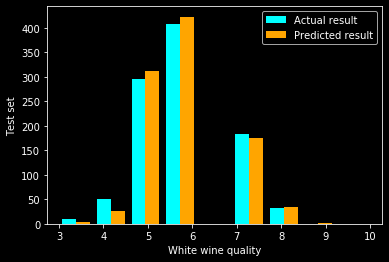

In [27]:
#Visualizing the test results
bins = np.linspace(3,10,10)
plt.hist([y_test,y_pred],bins=bins,color=['cyan','orange'],label=['Actual result','Predicted result'])
plt.xlabel('White wine quality')
plt.ylabel('Test set')
plt.legend()
plt.show()

---

In [28]:
##Training the Random Forest Classification model on the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
##Predicting test results
y_pred = classifier.predict(x_test)
print(y_pred)

[5 6 6 7 6 5 6 6 6 5 6 7 5 6 6 6 6 5 7 6 6 7 6 6 7 8 5 5 6 6 5 5 6 6 5 6 7
 7 7 6 5 5 5 6 5 6 5 7 7 6 7 6 5 6 6 7 5 6 5 6 5 5 6 6 7 6 5 5 5 5 6 5 5 7
 6 6 6 5 5 7 6 5 6 6 6 5 7 7 6 6 6 6 6 8 5 6 7 6 6 6 6 5 6 6 6 6 6 6 6 5 5
 6 6 6 7 7 5 5 6 5 5 6 5 5 5 7 5 6 6 7 6 6 7 6 6 5 6 6 5 6 5 7 6 6 6 7 6 6
 6 7 6 6 6 7 5 6 5 6 7 7 6 6 6 7 6 7 6 6 5 5 7 6 5 6 6 6 5 5 6 5 6 6 7 6 6
 5 6 6 5 6 6 6 6 7 6 6 6 6 6 6 6 6 5 6 6 5 6 5 7 6 5 8 7 6 5 8 6 6 7 7 6 6
 6 6 6 5 6 5 6 5 6 6 6 4 5 6 6 6 6 5 5 7 7 6 6 7 5 5 6 6 6 6 5 6 7 5 6 6 7
 6 7 6 6 6 5 6 6 6 5 6 6 7 5 6 5 5 6 6 6 6 7 5 5 6 6 6 6 5 5 6 6 7 8 6 5 5
 6 5 6 7 6 6 7 6 6 6 5 6 6 5 6 6 7 6 5 5 6 6 6 6 6 7 6 7 6 6 6 5 5 6 8 6 5
 6 7 6 4 5 5 4 7 5 6 7 6 6 5 7 6 6 6 5 6 6 7 6 5 6 5 7 7 6 7 6 7 5 6 7 5 6
 6 6 7 5 7 5 6 6 6 6 6 5 6 6 5 5 6 6 5 5 6 6 7 7 6 7 6 6 6 6 7 6 6 6 6 6 5
 6 5 7 5 6 6 6 5 6 5 6 7 7 6 6 6 5 6 5 6 6 6 7 6 6 5 5 6 6 6 5 6 5 5 5 5 6
 7 7 6 6 7 6 6 6 6 5 5 5 6 6 6 5 6 5 6 6 5 8 6 5 5 6 6 6 5 5 5 5 6 6 6 6 6
 6 7 5 6 6 6 7 5 6 7 5 7 

In [30]:
##Calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.6459183673469387
[[  0   0   5   4   0   0]
 [  0   6  23  22   0   0]
 [  0   0 195  98   2   0]
 [  0   0  54 329  26   0]
 [  0   0   6  80  94   3]
 [  0   0   1  14   9   9]]


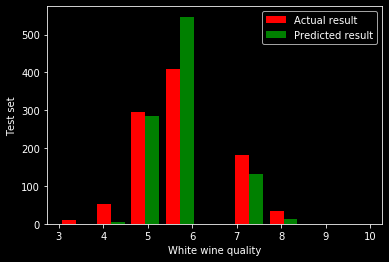

In [31]:
#Visualizing the test results
bins = np.linspace(3,10,10)
plt.hist([y_test,y_pred],bins=bins,color=['red','green'],label=['Actual result','Predicted result'])
plt.xlabel('White wine quality')
plt.ylabel('Test set')
plt.legend()
plt.show()